<a href="https://colab.research.google.com/github/yash2998chhabria/Rnn-Nlp/blob/master/ScrapedDatasetRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 

In [5]:
Combined_df = pd.read_csv("/content/drive/MyDrive/depressionrnn/scrapedtotaldataset.csv") 

In [6]:
Combined_df

,story,condition
0,It started with feeling irritated over small i...,1
1,At 16 years old I sat in my first therapy sess...,1
2,"Depression is debilitating.,Some people unders...",1
3,Depression can be a face of someone who is smi...,1
4,"For a long while, I've been having issues with...",1
...,...,...
1365,&nbsp;\r\n\r\n*[Previous chapter](https://www....,0
1366,\[[first](https://www.reddit.com/r/HFY/comment...,0
1367,\[[first](https://www.reddit.com/r/HFY/comment...,0
1368,\[[first](https://www.reddit.com/r/HFY/comment...,0


In [7]:
import spacy
import torch
import torchtext
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [8]:
tweets = Combined_df

In [10]:
tweets = tweets.rename(index = str, columns = {'story': 'SentimentText', 'condition': 'Sentiment'})

tweets.head()

,SentimentText,Sentiment
0,It started with feeling irritated over small i...,1
1,At 16 years old I sat in my first therapy sess...,1
2,"Depression is debilitating.,Some people unders...",1
3,Depression can be a face of someone who is smi...,1
4,"For a long while, I've been having issues with...",1


In [11]:
tweets=tweets.dropna()

In [12]:
tweets.shape

(1368, 2)

In [13]:
tweets['Sentiment'].unique()

array([1, 0])

In [14]:
tweets.Sentiment.value_counts()

1    699
0    669
Name: Sentiment, dtype: int64

[Text(0.5, 0, 'Labels')]

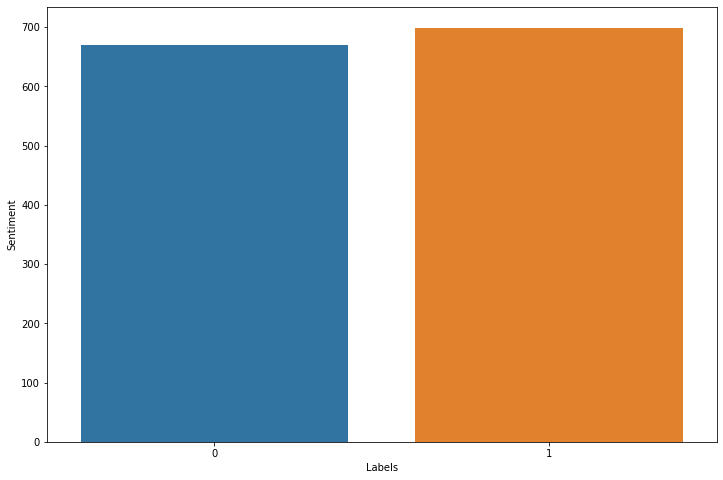

In [15]:
fig = plt.figure(figsize=(12, 8))

ax = sns.barplot(x=tweets.Sentiment.unique(), y=tweets.Sentiment.value_counts())

ax.set(xlabel='Labels')

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tweets, test_size=0.2, random_state=42)

In [17]:
train.reset_index(drop=True), test.reset_index(drop=True)

(                                          SentimentText  Sentiment
 0     I have struggled with , , and , for the past 2...          1
 1       When I was 18 and still in high school, I we...          0
 2     There are seminal moments, defining moments in...          1
 3     Ok, so today I went to a zoom meeting about cl...          0
 4     Everything has limits, except for humans.  Or ...          0
 ...                                                 ...        ...
 1089  Just wanted to post an update for the fraud Pl...          0
 1090  https://www.reddit.com/r/legaladvice/comments/...          0
 1091  &nbsp;\r\n\r\n*[Previous chapter](https://www....          0
 1092  As a kid we would go to upstate New York on va...          0
 1093  California here, getting that out of the way. ...          0
 
 [1094 rows x 2 columns],
                                          SentimentText  Sentiment
 0    OCD... Oh yeah... OCD is about neatness and ti...          1
 1    This afternoon I

In [18]:
train.shape, test.shape

((1094, 2), (274, 2))

In [19]:
train.to_csv('/content/drive/MyDrive/depressionrnn/train_tweets.csv', index=False)
test.to_csv('/content/drive/MyDrive/depressionrnn/test_tweets.csv', index=False)

In [20]:
def tweet_clean(text):
    
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) 
    text = re.sub(r'https?:/\/\S+', ' ', text) 
    
    return text.strip()

In [21]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [22]:
TEXT = torchtext.data.Field(tokenize = tokenizer)

LABEL = torchtext.data.LabelField(dtype = torch.float)

In [23]:
datafields = [('SentimentText', TEXT),('Sentiment', LABEL)]

In [26]:
trn, tst = torchtext.data.TabularDataset.splits(path = '/content/drive/MyDrive/depressionrnn/', 
                                                train = 'train_tweets.csv',
                                                test = 'test_tweets.csv',    
                                                format = 'csv',
                                                skip_header = True,
                                                fields = datafields)

In [27]:
print(f'Number of training examples: {len(trn)}')
print(f'Number of testing examples: {len(tst)}')

Number of training examples: 1094
Number of testing examples: 274


In [28]:
vars(trn.examples[0])

{'Sentiment': '1',
 'SentimentText': ['i',
  'have',
  'struggled',
  'with',
  'and',
  'for',
  'the',
  'past',
  '2',
  'years',
  'during',
  'this',
  'time',
  'i',
  'also',
  'had',
  'a',
  'baby',
  'and',
  'i',
  'am',
  'also',
  'a',
  'busy',
  'mum',
  'to',
  'my',
  '15',
  'year',
  'old',
  'daughter',
  'i',
  've',
  'also',
  'had',
  'lots',
  'of',
  'support',
  'from',
  'my',
  'husband',
  'a',
  'team',
  'of',
  'healthcare',
  'professionals',
  'family',
  'and',
  'friends',
  'being',
  'involved',
  'with',
  'the',
  'campaign',
  'and',
  'attending',
  'a',
  'recovery',
  'college',
  'has',
  'really',
  'motivated',
  'me',
  'in',
  'fact',
  'i',
  'am',
  'recovering',
  'well',
  'that',
  'i',
  'felt',
  'it',
  'was',
  'time',
  'to',
  'give',
  'myself',
  'a',
  'daily',
  'challenge',
  'every',
  'day',
  'i',
  'try',
  'to',
  'talk',
  'briefly',
  'to',
  'a',
  'random',
  'stranger',
  'about',
  'the',
  'difficulties',
  '

In [29]:
vars(tst.examples[0])

{'Sentiment': '1',
 'SentimentText': ['ocd',
  'oh',
  'yeah',
  'ocd',
  'is',
  'about',
  'neatness',
  'and',
  'tidiness',
  'isn',
  't',
  'it',
  'it',
  's',
  'about',
  'keeping',
  'things',
  'in',
  'order',
  'it',
  's',
  'washing',
  'your',
  'hands',
  'a',
  'lot',
  'this',
  'was',
  'my',
  'and',
  'i',
  'm',
  'sure',
  'many',
  'other',
  'people',
  's',
  'view',
  'of',
  'ocd',
  'in',
  'fact',
  'i',
  'make',
  'fun',
  'of',
  'myself',
  'a',
  'lot',
  'because',
  'i',
  'am',
  'incredibly',
  'untidy',
  'i',
  'wish',
  'i',
  'had',
  'the',
  'tidiness',
  'part',
  'of',
  'ocd',
  'i',
  'claim',
  'but',
  'i',
  'know',
  'that',
  'really',
  'i',
  'wish',
  'i',
  'didn',
  't',
  'experience',
  'this',
  'condition',
  'at',
  'all',
  'people',
  'laugh',
  'about',
  'the',
  'compulsions',
  'that',
  'can',
  'come',
  'with',
  'ocd',
  'i',
  'know',
  'i',
  'have',
  'done',
  'it',
  'myself',
  'with',
  'a',
  'laugh',
  

In [30]:
TEXT.build_vocab(trn, max_size=25000,
                 vectors="glove.6B.100d",
                 unk_init=torch.Tensor.normal_)

LABEL.build_vocab(trn)

.vector_cache/glove.6B.zip: 862MB [06:27, 2.22MB/s]                          
 99%|█████████▉| 397857/400000 [00:20<00:00, 21308.40it/s]

In [31]:
print(TEXT.vocab.freqs.most_common(50))

[('the', 40082), ('i', 30574), ('to', 28783), ('and', 25635), ('a', 20110), ('of', 18317), ('that', 13403), ('it', 13368), ('was', 13157), ('my', 12158), ('in', 11162), ('you', 7148), ('me', 7146), ('t', 6976), ('with', 6841), ('for', 6784), ('had', 6434), ('they', 6027), ('as', 5840), ('he', 5790), ('is', 5736), ('on', 5697), ('but', 5459), ('s', 5358), ('have', 5251), ('this', 4878), ('be', 4785), ('we', 4565), ('not', 4408), ('at', 4393), ('from', 3741), ('his', 3708), ('so', 3671), ('she', 3600), ('about', 3484), ('out', 3342), ('were', 3331), ('what', 3268), ('all', 3198), ('her', 3136), ('one', 3081), ('their', 3064), ('when', 3026), ('would', 3008), ('or', 2990), ('up', 2972), ('are', 2957), ('them', 2930), ('can', 2781), ('there', 2756)]


In [32]:
print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', 'the', 'i', 'to', 'and', 'a', 'of', 'that', 'it']


In [33]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f7b0ff39ea0>, {'1': 0, '0': 1})


In [34]:
train_iterator, test_iterator = torchtext.data.BucketIterator.splits(
                                (trn, tst),
                                batch_size = 64,
                                sort_key=lambda x: len(x.SentimentText),
                                sort_within_batch=False)

In [35]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, 
                 output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers = n_layers, 
                           bidirectional = bidirectional, dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        
        self.dropout = nn.Dropout(dropout)

        
    def forward(self, text):
        
        embedded = self.dropout(self.embedding(text))
        
        output, hidden = self.rnn(embedded)
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
       
        return self.fc(hidden.squeeze(0))

In [36]:
input_dim = len(TEXT.vocab)

embedding_dim = 100

hidden_dim = 20
output_dim = 1

n_layers = 2
bidirectional = True

dropout = 0.5

In [37]:
model = RNN(input_dim, 
            embedding_dim, 
            hidden_dim, 
            output_dim, 
            n_layers, 
            bidirectional, 
            dropout)

In [38]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [39]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.2264, -0.1698, -0.5443,  ..., -0.8675,  1.5221,  1.0766],
        [ 0.0685,  1.7735,  1.5197,  ...,  2.0164, -0.5793,  0.1839],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.0458, -0.2206, -0.4131,  ...,  0.0164, -0.4578,  0.1915],
        [-0.6544, -0.7541, -2.9852,  ...,  1.0020,  0.0176,  0.5351],
        [-0.4073, -0.4381, -0.7940,  ...,  0.4838, -0.5865,  0.7650]])

In [40]:
unk_idx = TEXT.vocab.stoi[TEXT.unk_token]
pad_idx = TEXT.vocab.stoi[TEXT.pad_token]

model.embedding.weight.data[unk_idx] = torch.zeros(embedding_dim)
model.embedding.weight.data[pad_idx] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.0458, -0.2206, -0.4131,  ...,  0.0164, -0.4578,  0.1915],
        [-0.6544, -0.7541, -2.9852,  ...,  1.0020,  0.0176,  0.5351],
        [-0.4073, -0.4381, -0.7940,  ...,  0.4838, -0.5865,  0.7650]])


In [41]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr= 0.0005)

criterion = nn.BCEWithLogitsLoss()

In [42]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.SentimentText).squeeze(1)
        
        loss = criterion(predictions, batch.Sentiment)
        
        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [43]:
num_epochs = 10

for epoch in range(num_epochs):
     
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% |')

 99%|█████████▉| 397857/400000 [00:40<00:00, 21308.40it/s]

| Epoch: 01 | Train Loss: 0.691 | Train Acc: 53.44% |
| Epoch: 02 | Train Loss: 0.689 | Train Acc: 52.55% |
| Epoch: 03 | Train Loss: 0.680 | Train Acc: 56.08% |
| Epoch: 04 | Train Loss: 0.673 | Train Acc: 60.62% |
| Epoch: 05 | Train Loss: 0.669 | Train Acc: 61.98% |
| Epoch: 06 | Train Loss: 0.668 | Train Acc: 60.13% |
| Epoch: 07 | Train Loss: 0.668 | Train Acc: 59.92% |
| Epoch: 08 | Train Loss: 0.656 | Train Acc: 62.01% |
| Epoch: 09 | Train Loss: 0.639 | Train Acc: 63.86% |
| Epoch: 10 | Train Loss: 0.634 | Train Acc: 65.25% |


In [44]:
epoch_loss = 0
epoch_acc = 0

model.eval()

with torch.no_grad():

    for batch in test_iterator:

        predictions = model(batch.SentimentText).squeeze(1)

        loss = criterion(predictions, batch.Sentiment)

        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum()/len(correct)

        epoch_loss += loss.item()
        epoch_acc += acc.item()


test_loss = epoch_loss / len(test_iterator)
test_acc = epoch_acc / len(test_iterator)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.617 | Test Acc: 62.67%


In [45]:
num_epochs = 10

for epoch in range(num_epochs):
     
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.625 | Train Acc: 66.09% |
| Epoch: 02 | Train Loss: 0.593 | Train Acc: 72.83% |
| Epoch: 03 | Train Loss: 0.565 | Train Acc: 73.26% |
| Epoch: 04 | Train Loss: 0.526 | Train Acc: 77.34% |
| Epoch: 05 | Train Loss: 0.431 | Train Acc: 83.36% |
| Epoch: 06 | Train Loss: 0.353 | Train Acc: 89.15% |
| Epoch: 07 | Train Loss: 0.335 | Train Acc: 89.35% |
| Epoch: 08 | Train Loss: 0.292 | Train Acc: 91.49% |
| Epoch: 09 | Train Loss: 0.238 | Train Acc: 94.53% |
| Epoch: 10 | Train Loss: 0.247 | Train Acc: 92.88% |


In [46]:
epoch_loss = 0
epoch_acc = 0

model.eval()

with torch.no_grad():

    for batch in test_iterator:

        predictions = model(batch.SentimentText).squeeze(1)

        loss = criterion(predictions, batch.Sentiment)

        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum()/len(correct)

        epoch_loss += loss.item()
        epoch_acc += acc.item()


test_loss = epoch_loss / len(test_iterator)
test_acc = epoch_acc / len(test_iterator)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.153 | Test Acc: 96.25%
